In [1]:
import os

In [2]:
data_dir='/Users/mohanpraveenhazaru/Downloads/cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from matplotlib.image import imread

In [9]:
test_path=data_dir+'/test/'
train_path=data_dir+'/train'

In [10]:
test_path

'/Users/mohanpraveenhazaru/Downloads/cell_images/test/'

In [11]:
train_path

'/Users/mohanpraveenhazaru/Downloads/cell_images/train'

In [12]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [36]:
len(os.listdir(train_path+'/parasitized'))

12480

In [20]:
 para_cell=train_path+'/parasitized'+'/C84P45ThinF_IMG_20150818_102325_cell_93.png'

In [21]:
para_cell

'/Users/mohanpraveenhazaru/Downloads/cell_images/train/parasitized/C84P45ThinF_IMG_20150818_102325_cell_93.png'

In [23]:
imread(para_cell).shape

(130, 118, 3)

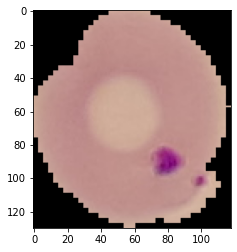

In [24]:
plt.imshow(imread(para_cell))

In [27]:
os.listdir(train_path+'/uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [28]:
uninfected= train_path+'/uninfected'+'/C13NThinF_IMG_20150614_131318_cell_179.png'



In [29]:
uninfected=imread(uninfected)

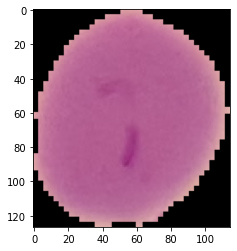

In [30]:
plt.imshow(uninfected)

In [31]:
pwd

'/Users/mohanpraveenhazaru'

In [37]:
len(os.listdir(train_path+'/uninfected'))

12480

In [44]:
dim1=[]
dim2=[]
for image_file in os.listdir('/Users/mohanpraveenhazaru/Downloads/cell_images/test/uninfected'):
    img=imread('/Users/mohanpraveenhazaru/Downloads/cell_images/test/uninfected/'+image_file)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

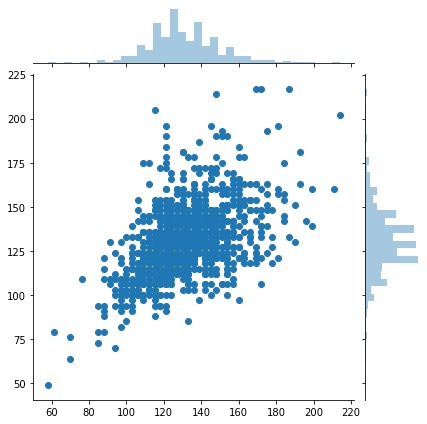

In [47]:
sns.jointplot(dim1,dim2)

In [50]:
# resize everything to same size
np.mean(dim1)

130.92538461538462

In [51]:
np.mean(dim2)

130.75

In [52]:
image_shape=(130,130,3)

In [53]:
130*130*3

50700

In [65]:
# manipulate data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

0.0

In [69]:
# heavy lifiting
image_gen=ImageDataGenerator(
                            rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest'
                            )

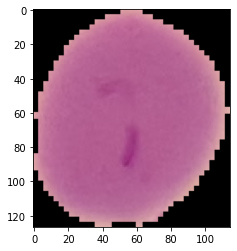

In [70]:
plt.imshow(uninfected)

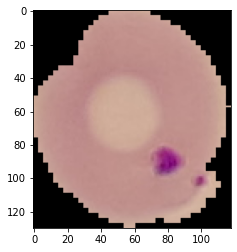

In [72]:
para_img=imread(para_cell)
plt.imshow(imread(para_cell))

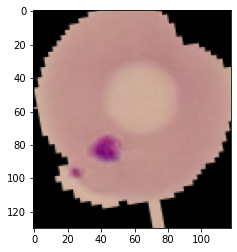

In [80]:
plt.imshow(image_gen.random_transform(para_img))

In [81]:
image_gen.flow_from_directory(train_path)
# finding how many clases and how many images

Found 24958 images belonging to 2 classes.


In [82]:
# in order to use flow_from_directory you need sub directories and theres a format
# for that 
os.listdir(train_path)

['parasitized', 'uninfected']

In [83]:
# if youre dealing with multiclass you need sperate folders a folder for a class
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [91]:
from tensorflow.keras.models import Sequential

In [95]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [98]:
model=Sequential()
# Add convolution layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# faltten the model

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# drop half newuron to prevent over fitting
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
# compile model use loss=binary_crossentropy optimizer=adam

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [99]:
model.summary()
# will give the details of model and its parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [100]:
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [102]:
batch_size=16
# smaller batch size training time will increase

In [103]:
train_image_gen=image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [105]:
test_image_gen=image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=False)

Found 2600 images belonging to 2 classes.


In [106]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [108]:
results=model.fit_generator(train_image_gen,epochs=20,
                            validation_data=test_image_gen,
                            callbacks=[early_stop])

/Users/mohanpraveenhazaru/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
163/163 [==============================] - 50s 303ms/step - loss: 25.6298 - accuracy: 0.4891 - val_loss: 0.6904 - val_accuracy: 0.5415
Epoch 2/20
163/163 [==============================] - 47s 288ms/step - loss: 0.9516 - accuracy: 0.5142 - val_loss: 0.6968 - val_accuracy: 0.5069
Epoch 3/20
163/163 [==============================] - 46s 280ms/step - loss: 0.6987 - accuracy: 0.4494 - val_loss: 0.6927 - val_accuracy: 0.5100


In [109]:
from tensorflow.keras.models import load_model

In [111]:
models=load_model('/Users/mohanpraveenhazaru/Downloads/TF_2_Notebooks_and_Data/04-CNNs/malaria_detector.h5')

In [112]:
model.history.history

{'loss': [6.209315299987793, 1.149397373199463, 0.6974729895591736],
 'accuracy': [0.48461538553237915, 0.5061538219451904, 0.4607692360877991],
 'val_loss': [0.6903691291809082, 0.6968291997909546, 0.6926901340484619],
 'val_accuracy': [0.5415384769439697, 0.5069230794906616, 0.5099999904632568]}

In [113]:
model.evaluate_generator(test_image_gen)

/Users/mohanpraveenhazaru/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6928367018699646, 0.5099999904632568]

In [115]:
model.metrics_names

['loss', 'accuracy']

In [116]:
# open image and feed it to the model( this generator_function)
pred=model.predict_generator(test_image_gen)

/Users/mohanpraveenhazaru/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [117]:
predictions=pred>0.5
# play with this number if its half of or 80%

In [118]:
predictions

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [119]:
len(pred)

2600

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [122]:
print (classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.51      0.81      0.63      1300
           1       0.55      0.23      0.32      1300

    accuracy                           0.52      2600
   macro avg       0.53      0.52      0.47      2600
weighted avg       0.53      0.52      0.47      2600



In [123]:
print (confusion_matrix(test_image_gen.classes,predictions))

[[1056  244]
 [1005  295]]


In [124]:
para_cell

'/Users/mohanpraveenhazaru/Downloads/cell_images/train/parasitized/C84P45ThinF_IMG_20150818_102325_cell_93.png'

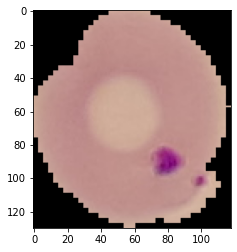

In [126]:
plt.imshow(imread('/Users/mohanpraveenhazaru/Downloads/cell_images/train/parasitized/C84P45ThinF_IMG_20150818_102325_cell_93.png'))

In [127]:
from tensorflow.keras.preprocessing import image

In [129]:
my_image=image.load_img(para_cell,target_size=image_shape)

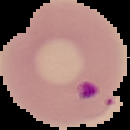

In [131]:
my_image_array=image.img_to_array(my_image)

In [133]:
my_image_array.shape

(130, 130, 3)

In [137]:
my_img_arr=np.expand_dims(my_image_array,axis=0)